# Анализ аудитории. За 2013-2019гг

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_table(f'data/src/{2013}/part-00000', index_col=False, header=None,
              names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation',
                     'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age',
                     'bikeid'], sep=',')

for i in range(2014, 2020):
    df2 = pd.read_table(f'data/src/{i}/part-00000', index_col=False, header=None,
              names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation',
                     'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age',
                     'bikeid'], sep=',')
    df = pd.concat([df, df2])

In [4]:
df

,id,biketype,starttime,endtime,startstation,endstation,startlat,startlng,endlat,endlng,member_casual,gender,age,bikeid
0,126212,NaN,2013-07-29T19:03:00,2013-07-29T19:21:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Customer,NaN,NaN,847
1,153535,NaN,2013-08-04T00:22:00,2013-08-04T00:46:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Customer,NaN,NaN,513
2,74162,NaN,2013-07-17T23:45:00,2013-07-18T00:09:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Subscriber,Male,25.0,505
3,572092,NaN,2013-09-23T19:58:00,2013-09-23T20:24:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Subscriber,Male,38.0,2407
4,71712,NaN,2013-07-17T09:53:00,2013-07-17T10:18:00,State St & 16th St,Aberdeen St & Madison St,NaN,NaN,NaN,NaN,Customer,NaN,NaN,587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4522053,22344864,NaN,2019-04-17T15:16:28,2019-04-17T15:24:40,Halsted St & 69th St,Perry Ave & 69th St,Chicago,41.769062,Chicago,41.769293,Subscriber,Male,62.0,2831
4522054,22531855,NaN,2019-05-04T18:31:46,2019-05-04T18:37:32,Halsted St & 69th St,Perry Ave & 69th St,Chicago,41.769062,Chicago,41.769293,Subscriber,Male,32.0,5506
4522055,23010614,NaN,2019-06-05T21:34:32,2019-06-06T20:57:12,Halsted St & 69th St,Perry Ave & 69th St,Chicago,41.769062,Chicago,41.769293,Customer,Female,43.0,4391
4522056,23423527,NaN,2019-06-28T10:33:17,2019-06-28T10:39:47,Halsted St & 69th St,Perry Ave & 69th St,Chicago,41.769062,Chicago,41.769293,Subscriber,Male,32.0,6317


In [5]:
age_payment = df[['age', 'member_casual']]
age_payment = age_payment.dropna()
age_payment

,age,member_casual
2,25.0,Subscriber
3,38.0,Subscriber
6,37.0,Subscriber
7,52.0,Subscriber
8,41.0,Subscriber
...,...,...
4522053,62.0,Subscriber
4522054,32.0,Subscriber
4522055,43.0,Customer
4522056,32.0,Subscriber


In [6]:
age_payment_cust = age_payment[age_payment['member_casual'] == 'Customer']
age_payment_sub = age_payment[age_payment['member_casual'] == 'Subscriber']

age_bins_sub = pd.cut(age_payment_sub['age'],
                    [0, 15, 18, 21, 24, 27, 30, 35, 40, 45, 50, 55, 60, 70, 90, age_payment_sub['age'].max()],
                    include_lowest=True)
age_bins_cust = pd.cut(age_payment_cust['age'],
                    [0, 15, 18, 21, 24, 27, 30, 35, 40, 45, 50, 55, 60, 70, 90, age_payment_cust['age'].max()],
                    include_lowest=True)
age_payment_sub['age_bins'] = age_bins_sub
age_payment_cust['age_bins'] = age_bins_cust

/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_15169/2241500041.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_payment_sub['age_bins'] = age_bins_sub
/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_15169/2241500041.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_payment_cust['age_bins'] = age_bins_cust


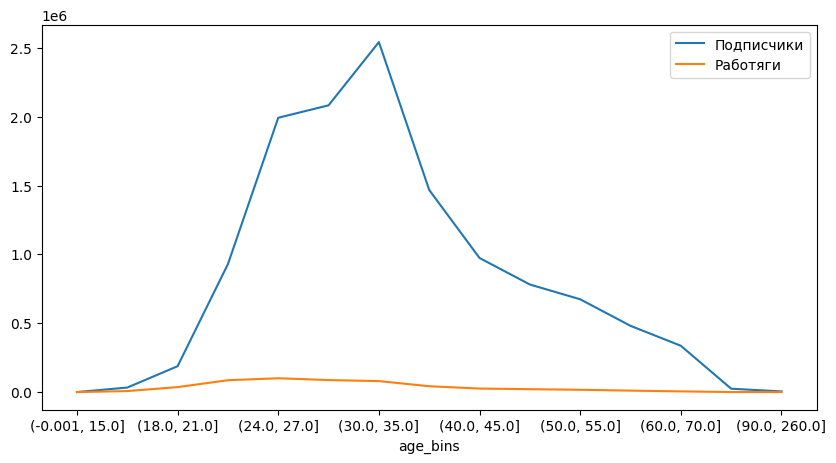

In [7]:
age_payment_sub = age_payment_sub.groupby('age_bins')['member_casual'].count()
age_payment_cust = age_payment_cust.groupby('age_bins')['member_casual'].count()

plt.figure(figsize=(10, 5))
age_payment_sub.plot()
age_payment_cust.plot()
plt.legend(['Подписчики', 'Работяги'])
plt.show()

### График кол-ва поездок по возрасту в зависимости от типа оплаты

Видим тенденцию, что подавляющее большинство платит по подписке. Не значит ли это, что она существует в убыток?


In [11]:
age_time = df[['age', 'starttime', 'endtime']]
age_time['starttime'] = pd.to_datetime(age_time['starttime'])
age_time['endtime'] = pd.to_datetime(age_time['endtime'])
age_time['duration'] = round((age_time['endtime'] - age_time['starttime']).dt.seconds / 60)
age_time = age_time[['age', 'duration']]

age_bins = pd.cut(age_time['age'],
                  [0, 15, 18, 21, 24, 27, 30, 35, 40, 45, 50, 55, 60, 70, 90, age_time['age'].max()],
                  include_lowest=True)
age_time['age_bins'] = age_bins
age_time = age_time.dropna().groupby('age_bins')['duration'].mean()
age_time

/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_15169/2384908655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_time['starttime'] = pd.to_datetime(age_time['starttime'])
/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_15169/2384908655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_time['endtime'] = pd.to_datetime(age_time['endtime'])
/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_15169/2384908655.py:4: SettingWithCopyWarning: 
A value is trying to be set o

age_bins
(-0.001, 15.0]    17.259434
(15.0, 18.0]      17.870521
(18.0, 21.0]      15.845013
(21.0, 24.0]      14.083902
(24.0, 27.0]      13.364379
(27.0, 30.0]      13.383882
(30.0, 35.0]      13.117726
(35.0, 40.0]      13.149935
(40.0, 45.0]      13.089321
(45.0, 50.0]      12.785958
(50.0, 55.0]      12.996700
(55.0, 60.0]      13.325265
(60.0, 70.0]      13.185847
(70.0, 90.0]      15.098561
(90.0, 260.0]     14.670702
Name: duration, dtype: float64

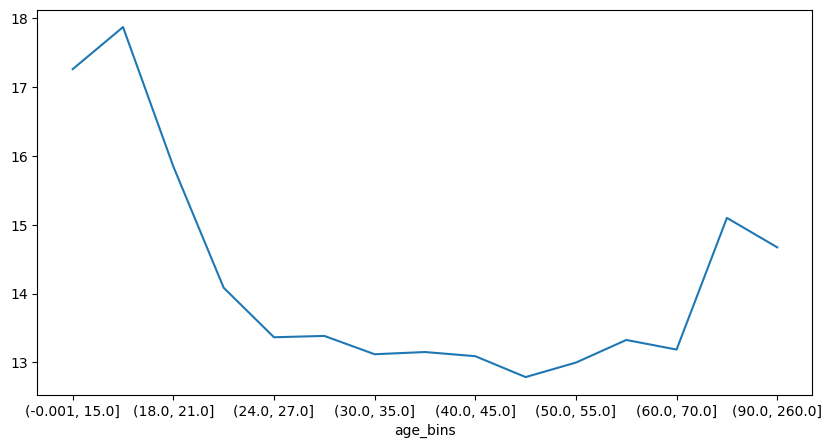

In [12]:
plt.figure(figsize=(10, 5))
age_time.plot()
plt.show()

#### Небольшой вывод: До 50 лет среднее время поездки снижается. После начинает расти
Возможно, у детей и подростков (до 21 года) нет своих велосипедов, поэтому они так долго катаются на своих велосипедах. А у более старших они есть.